Here we will be looking at the trends of FDI in India 2000 to 2017. 

FDI support on different sectors over the years indicates changes in interest over time.

1. Firing up colab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/FDI_in_India.csv')
df.head(3)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98


In [ ]:
len(df)

63

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


2. Setting the index and subsequent

In [9]:
df.set_index('Sector', inplace = True)

Year-wise total Investment

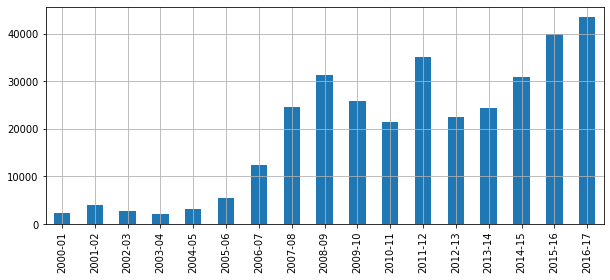

In [ ]:
df.sum(axis=0).plot(kind='bar', figsize=(10,4))
plt.grid()
plt.show()

sector-wise total investment over the years

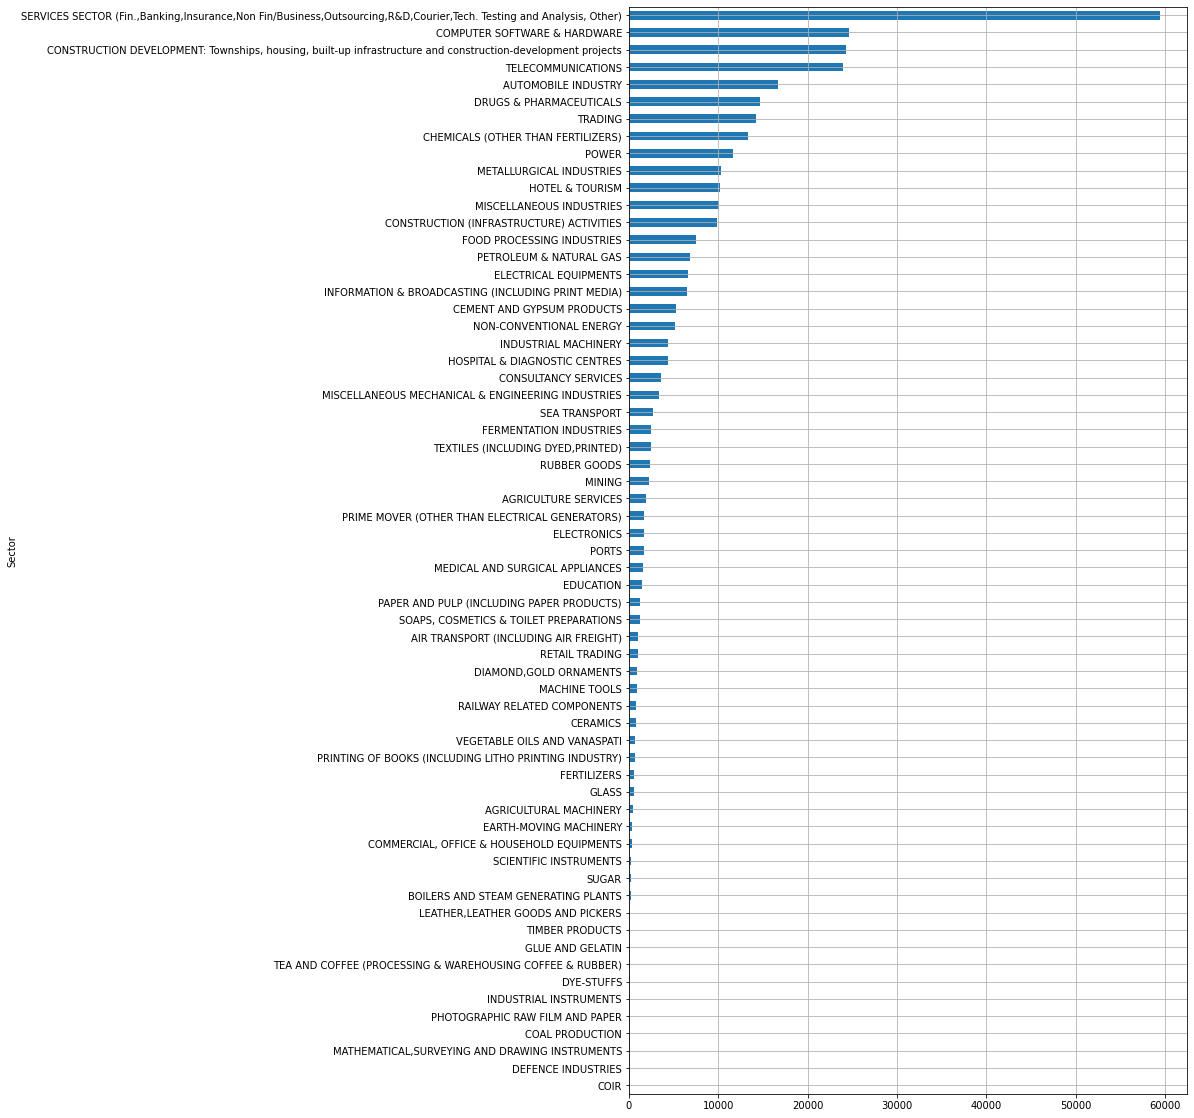

In [ ]:
df.sum(axis=1).sort_values().plot(kind = 'barh', figsize=(10,20))
plt.grid()
plt.show()

We find that from 2007 onwards there has been an overall large increase in Investment levels.

Also, Services (Finance, Banking etc.) sector has had the max overall investment while Coir has had the least investment overall across the years.

finding trends

a. correlation

In [ ]:
import numpy as np

new = df.transpose()
corrMatrix=new.corr()

corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) 

already_in = set()
result = []
for col in corrMatrix:
    perfect_corr = corrMatrix[col][corrMatrix[col] >= 0.9].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

result

[['TELECOMMUNICATIONS',
  'TEXTILES (INCLUDING DYED,PRINTED)',
  'GLUE AND GELATIN',
  'ELECTRICAL EQUIPMENTS'],
 ['TRADING', 'AUTOMOBILE INDUSTRY'],
 ['SUGAR',
  'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
  'AIR TRANSPORT (INCLUDING AIR FREIGHT)'],
 ['RETAIL TRADING', 'SEA TRANSPORT'],
 ['SOAPS, COSMETICS & TOILET PREPARATIONS', 'INDUSTRIAL MACHINERY'],
 ['DEFENCE INDUSTRIES', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'],
 ['TEXTILES (INCLUDING DYED,PRINTED)', 'MEDICAL AND SURGICAL APPLIANCES'],
 ['GLASS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'],
 ['DIAMOND,GOLD ORNAMENTS', 'DYE-STUFFS'],
 ['FOOD PROCESSING INDUSTRIES', 'FERMENTATION INDUSTRIES']]

Above we set the correlation coefficient score to 0.9.

Now that we plot them to observe price trends considering each group as a separate segment wherein sectors have high correlation with each other.

In [40]:
X = list(df.columns)
#X.remove('Sector')
X 

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17']

plotting graphs for each groups which are highly correlated

In [37]:
from sklearn.preprocessing import Normalizer
df.iloc[:,:] = Normalizer(norm='l1').fit_transform(df)
df.head(2)

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,0.002196,0.001369,0.003544,0.000785,0.019397,0.014436,0.016450,0.113813,0.092923,0.040645,0.106300,0.172899,0.141932,0.054947,0.034784,0.044171,0.13941
MINING,0.000581,0.002870,0.004428,0.010335,0.004367,0.003257,0.002914,0.195596,0.015036,0.076766,0.034998,0.062791,0.025482,0.005603,0.301251,0.229185,0.02454


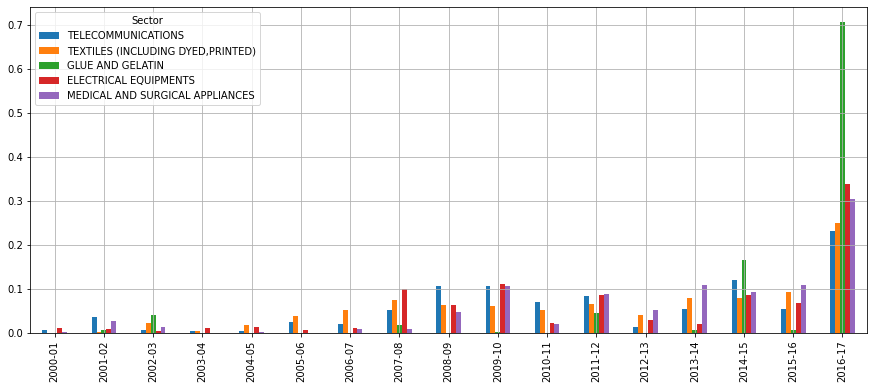

In [41]:
df_1 = df.loc[['TELECOMMUNICATIONS',
  'TEXTILES (INCLUDING DYED,PRINTED)',
  'GLUE AND GELATIN',
  'ELECTRICAL EQUIPMENTS','MEDICAL AND SURGICAL APPLIANCES'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()
#df_1

In the figure above, we see that 6016-17 period saw the highest investment with Glue and gelatin leading the group. 

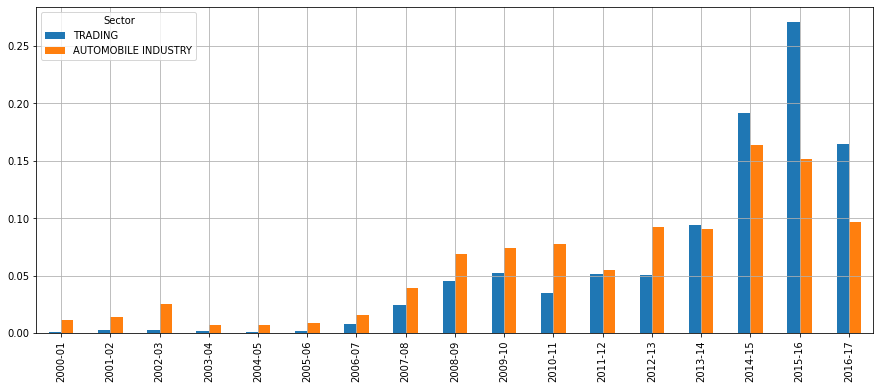

In [42]:
df_1 = df.loc[['TRADING', 'AUTOMOBILE INDUSTRY'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()
#df_1

Here, while Automobile has been leading over trading, 2013-14 onwards, trading picked up more investment. Overall, a cyclic pattern with increments is observed. 

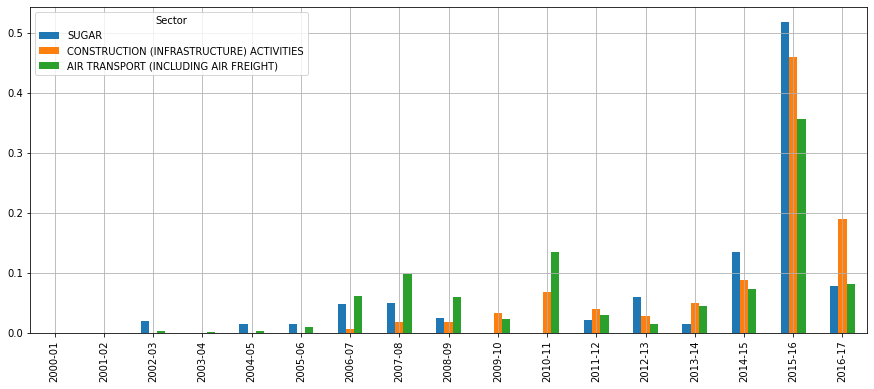

In [43]:
df_1 = df.loc[['SUGAR',
  'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
  'AIR TRANSPORT (INCLUDING AIR FREIGHT)'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

Sugar and air transport seem to be more prominent here in the beginning until 2007-08 period, with construction taking prominence post that. 

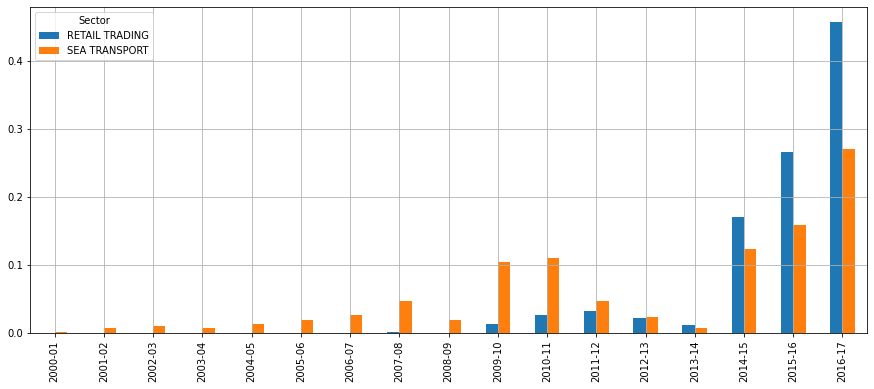

In [44]:
df_1 = df.loc[['RETAIL TRADING', 'SEA TRANSPORT'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

The sea transport sector oberves almost a flat normal curve (seemingly like a platykurtik curve) [upto 2013-14 from the beginining]. Post that period, retail picked up significant prominence. 

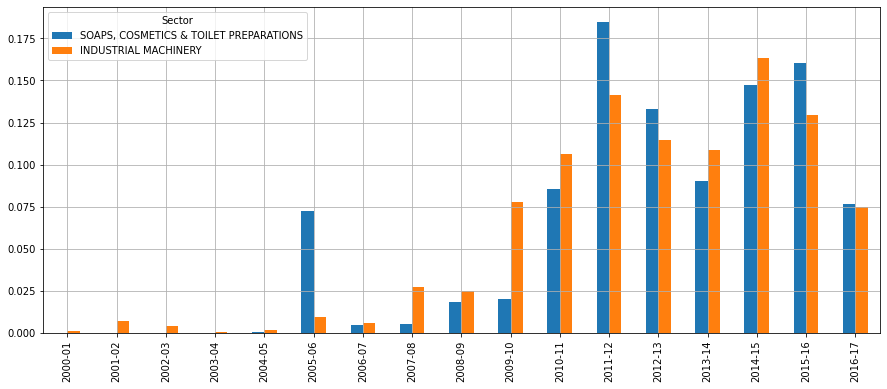

In [45]:
df_1 = df.loc[['SOAPS, COSMETICS & TOILET PREPARATIONS', 'INDUSTRIAL MACHINERY'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

This sector has seen significant investment growth 2010-11 onwards for either sectors in this group and their seems a cyclic movement ever since in investment pattern.

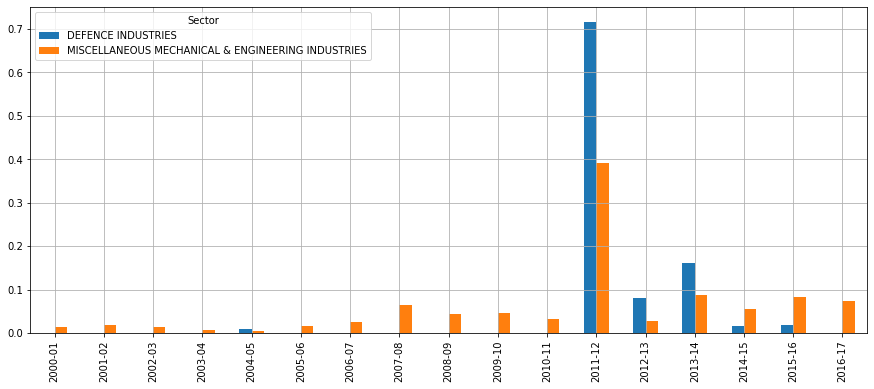

In [46]:
df_1 = df.loc[['DEFENCE INDUSTRIES', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

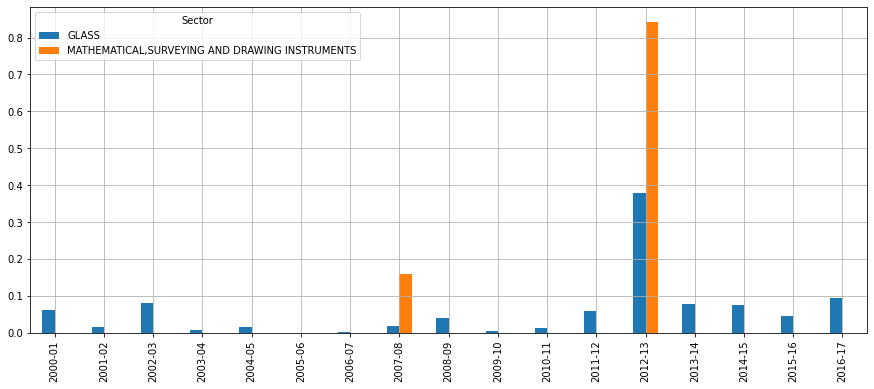

In [47]:
df_1 = df.loc[['GLASS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

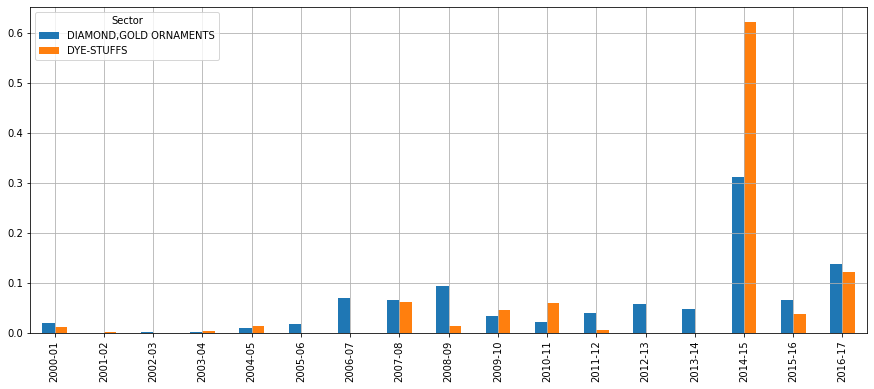

In [48]:
df_1 = df.loc[['DIAMOND,GOLD ORNAMENTS', 'DYE-STUFFS'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

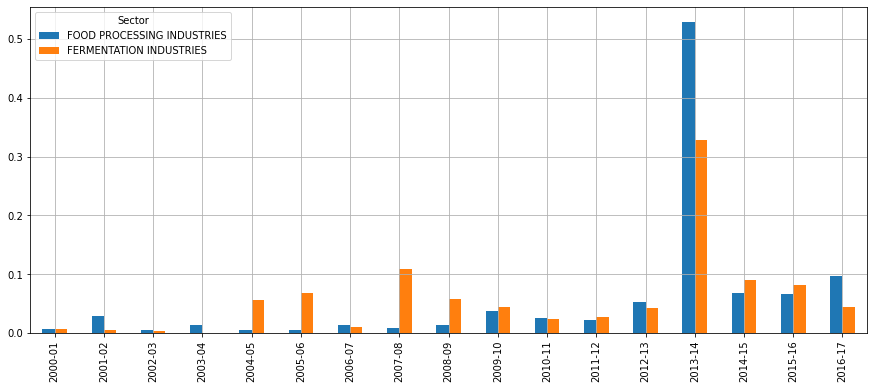

In [49]:
df_1 = df.loc[['FOOD PROCESSING INDUSTRIES', 'FERMENTATION INDUSTRIES'], X]
df_1.transpose().plot(kind = 'bar', figsize=(15,6))
plt.grid()
plt.show()

For the above four groups, we observe spikes in investment in certain periods mostly in 2012-2014 period. Hence, we can infer that perhaps there is a connection between improvement in one sector group infleuncing growth and progress in subsequent sector groups. This area should be investigated with further data, so we can inform these aspects and sustain investments, collectively. 

Top and bottom sectors invested in.

Top-most 10


In [ ]:
df.sum(axis=1).nlargest(10)

Sector
SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)    59476.49
COMPUTER SOFTWARE & HARDWARE                                                                                           24669.49
CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects            24293.09
TELECOMMUNICATIONS                                                                                                     23946.01
AUTOMOBILE INDUSTRY                                                                                                    16673.92
DRUGS & PHARMACEUTICALS                                                                                                14706.90
TRADING                                                                                                                14210.88
CHEMICALS (OTHER THAN FERTILIZERS)                                                               

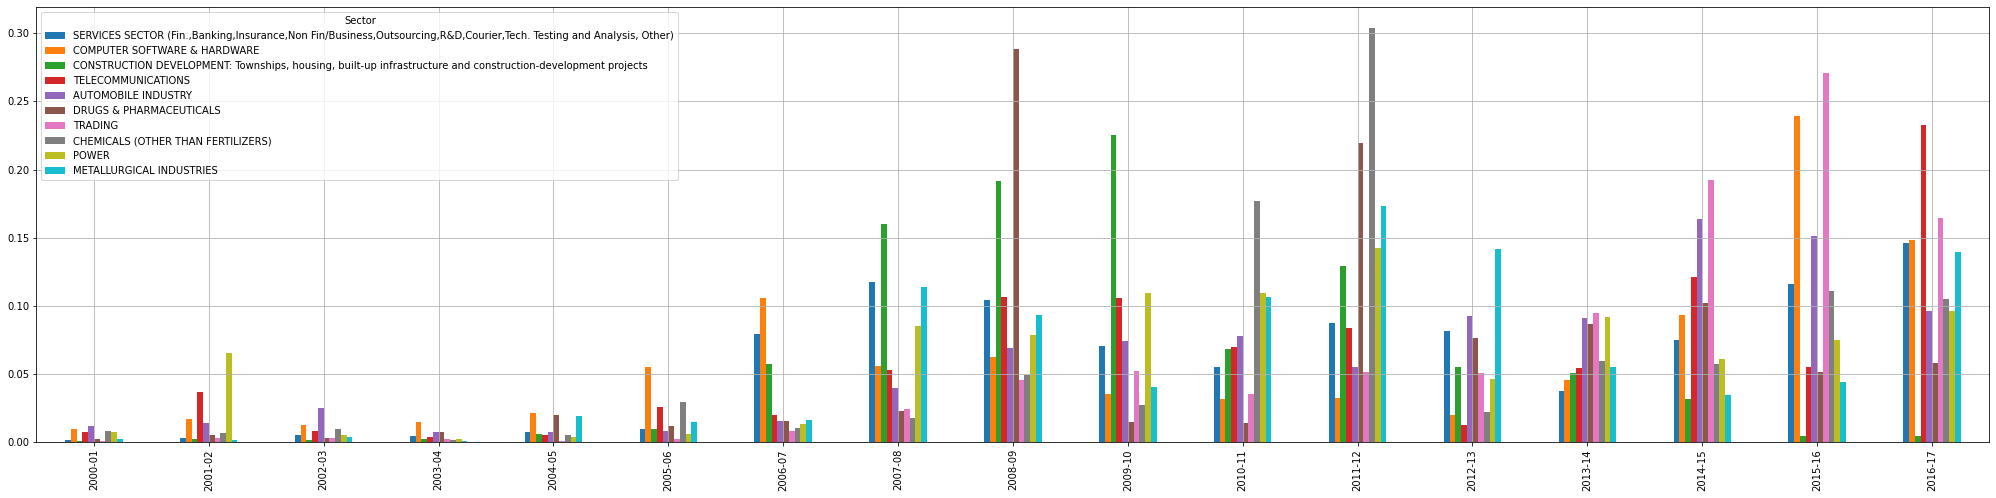

In [50]:
df_1 = df.loc[['SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)',
'COMPUTER SOFTWARE & HARDWARE',                                                                                        
'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects',      
'TELECOMMUNICATIONS',                                                                                                   
'AUTOMOBILE INDUSTRY',                                                                                                  
'DRUGS & PHARMACEUTICALS',                                                                                                
'TRADING',                                                                                                                
'CHEMICALS (OTHER THAN FERTILIZERS)',                                                                                     
'POWER',                                                                                                                  
'METALLURGICAL INDUSTRIES'   ], X]
df_1.transpose().plot(kind = 'bar', figsize=(35,8))
plt.grid()
plt.show()

Bottom - 10

In [ ]:
s = df.sum(axis=1).sort_values(ascending=True)
s.head(10)

Sector
COIR                                                           4.06
DEFENCE INDUSTRIES                                             5.12
MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS                 7.98
COAL PRODUCTION                                               27.74
PHOTOGRAPHIC RAW FILM AND PAPER                               67.28
INDUSTRIAL INSTRUMENTS                                        76.12
DYE-STUFFS                                                    88.40
TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)    111.22
GLUE AND GELATIN                                             128.39
TIMBER PRODUCTS                                              157.68
dtype: float64

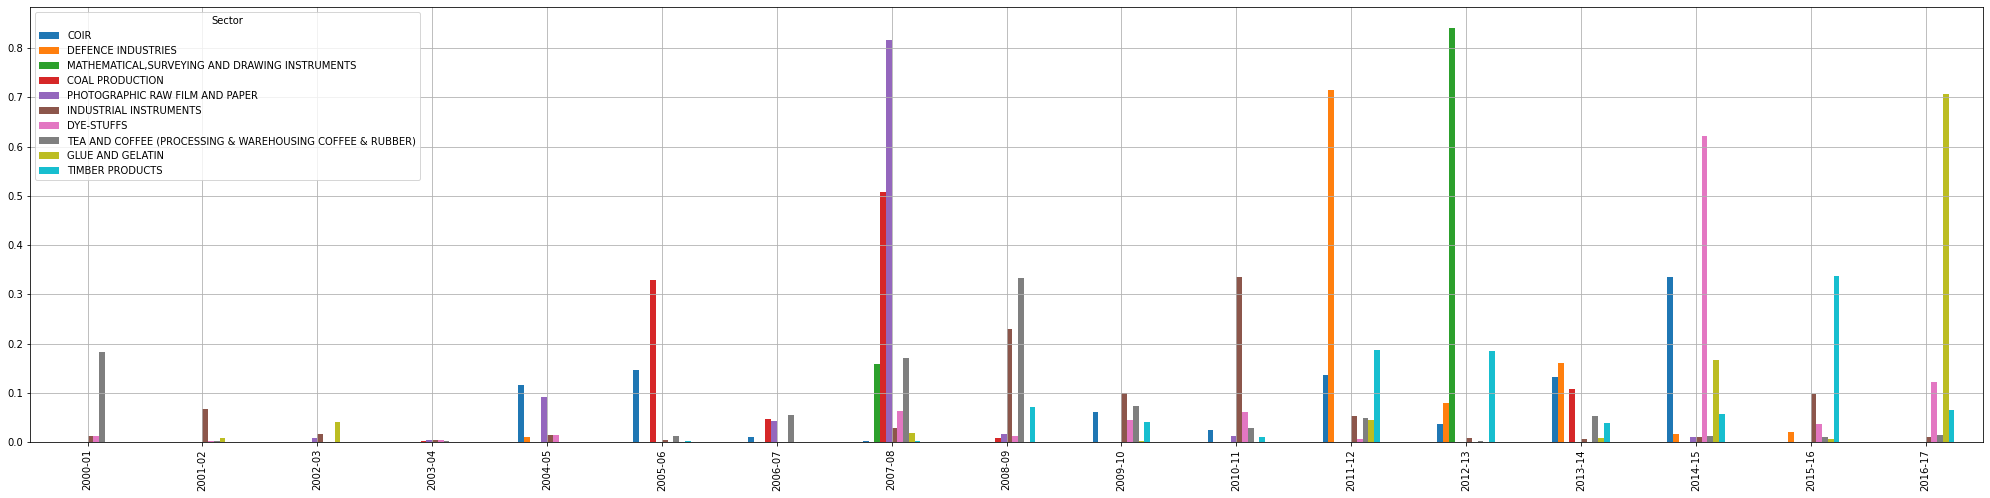

In [51]:
df_1 = df.loc[['COIR',                                                     
'DEFENCE INDUSTRIES',                                            
'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS',                 
'COAL PRODUCTION',                                               
'PHOTOGRAPHIC RAW FILM AND PAPER',                            
'INDUSTRIAL INSTRUMENTS',                                 
'DYE-STUFFS',                                            
'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)',  
'GLUE AND GELATIN',                                      
'TIMBER PRODUCTS'], X]
df_1.transpose().plot(kind = 'bar', figsize=(35,8))
plt.grid()
plt.show()

Year wise Max and min Sectors invested into.

In [ ]:
df.idxmax()

2000-01                             MISCELLANEOUS INDUSTRIES
2001-02                                   TELECOMMUNICATIONS
2002-03                                  AUTOMOBILE INDUSTRY
2003-04                         COMPUTER SOFTWARE & HARDWARE
2004-05                         COMPUTER SOFTWARE & HARDWARE
2005-06                         COMPUTER SOFTWARE & HARDWARE
2006-07    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2007-08    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2008-09    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2009-10    CONSTRUCTION DEVELOPMENT: Townships, housing, ...
2010-11    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2011-12    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2012-13    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2013-14                           FOOD PROCESSING INDUSTRIES
2014-15    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2015-16    SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...
2016-17    SERVICES SECT

In [ ]:
df.idxmin()

2000-01                           NON-CONVENTIONAL ENERGY
2001-02                           NON-CONVENTIONAL ENERGY
2002-03                                   COAL PRODUCTION
2003-04    PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)
2004-05                                   COAL PRODUCTION
2005-06               BOILERS AND STEAM GENERATING PLANTS
2006-07                                             PORTS
2007-08                            SCIENTIFIC INSTRUMENTS
2008-09               BOILERS AND STEAM GENERATING PLANTS
2009-10                                   COAL PRODUCTION
2010-11                                   COAL PRODUCTION
2011-12                                   COAL PRODUCTION
2012-13                                   COAL PRODUCTION
2013-14    MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS
2014-15                                   COAL PRODUCTION
2015-16                                   COAL PRODUCTION
2016-17                                   COAL PRODUCTION
dtype: object

The min values shows that while COIR is sector within Bottom-10 total investment, in majority years COAL Production had least investment, while COIR didn't have the minimum investment in any year. 

Percent changes in defferent time periods for the sectors.

1. 2000 - 2005

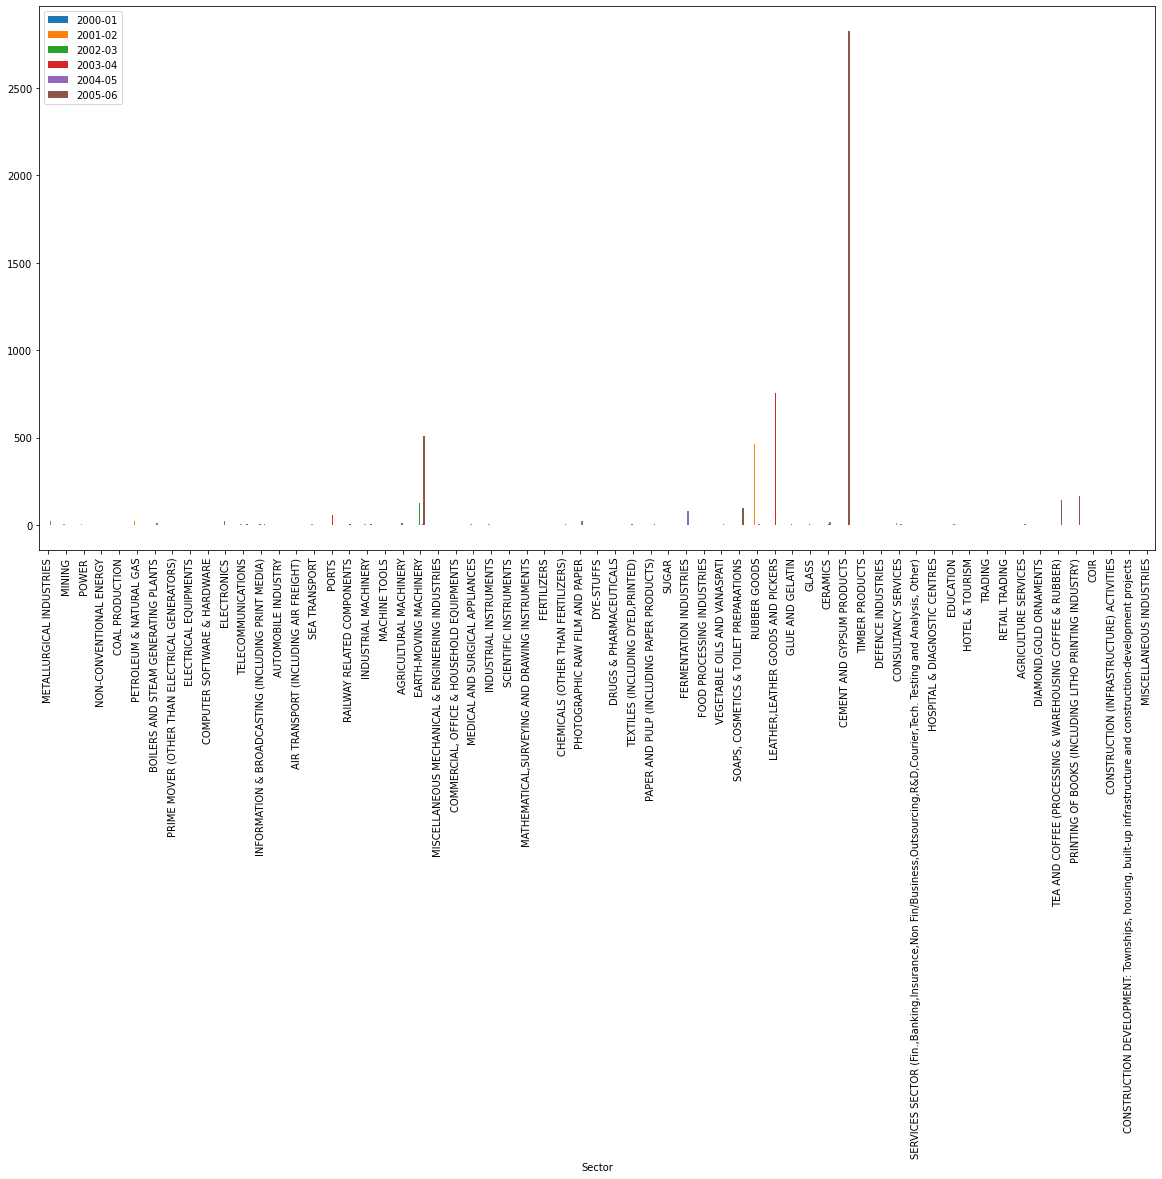

In [30]:
df.iloc[:, 0:6].pct_change(axis=1).plot(kind = 'bar', figsize=(20,10))

2006 - 2010

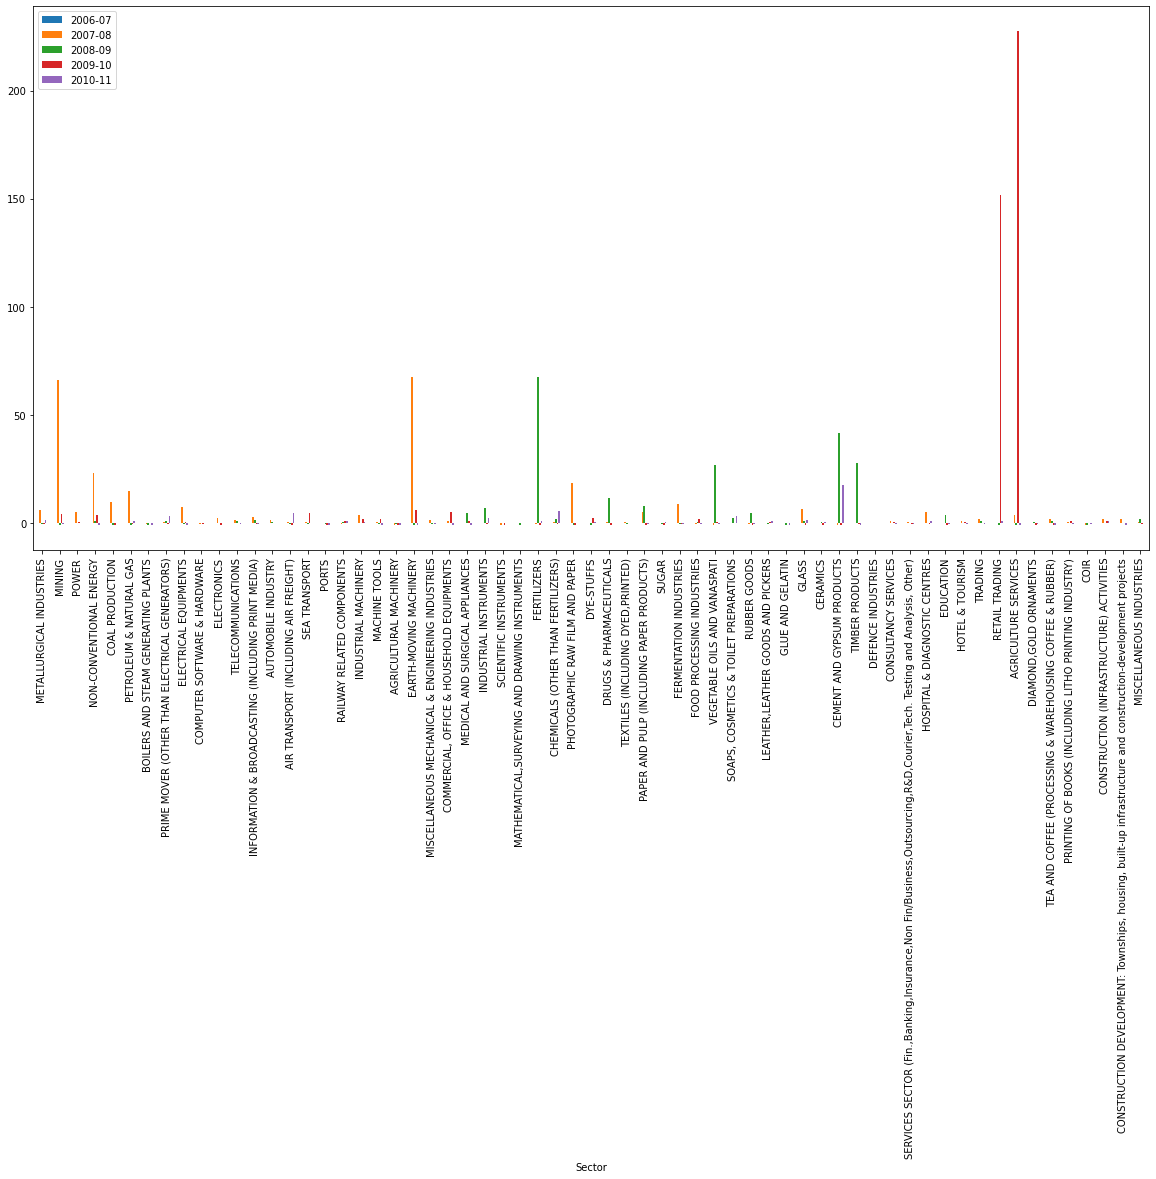

In [28]:
df.iloc[:, 6:11].pct_change(axis=1).plot(kind = 'bar', figsize=(20,10))

2011 - 2016

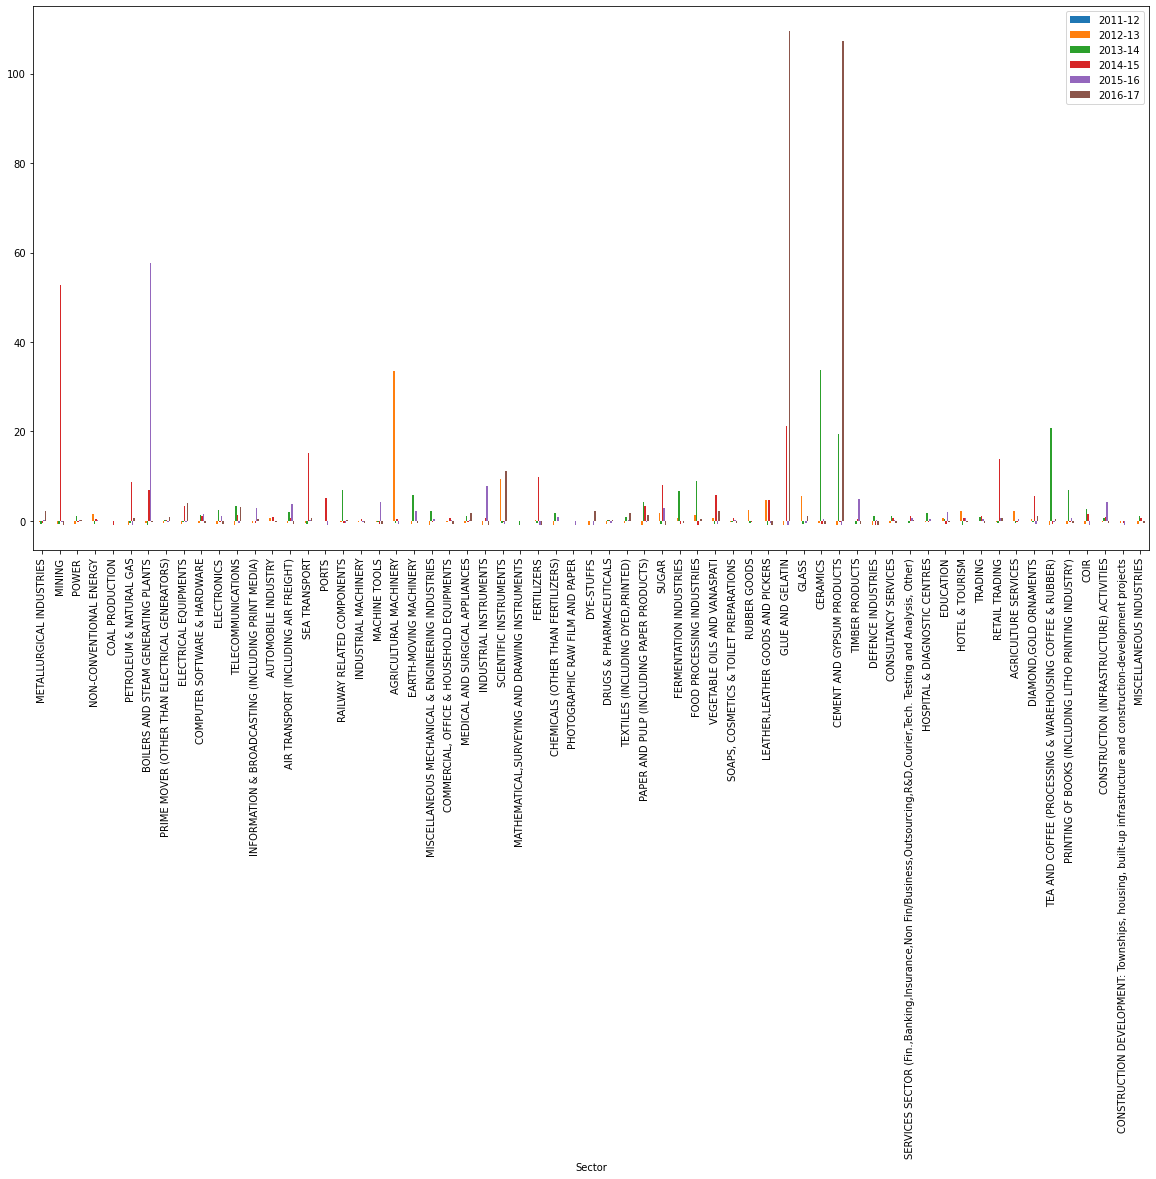

In [24]:
df.iloc[:, 11:].pct_change(axis=1).plot(kind = 'bar', figsize=(20,10))

From 2007 - 2016-17, because it marked period of sharp increase

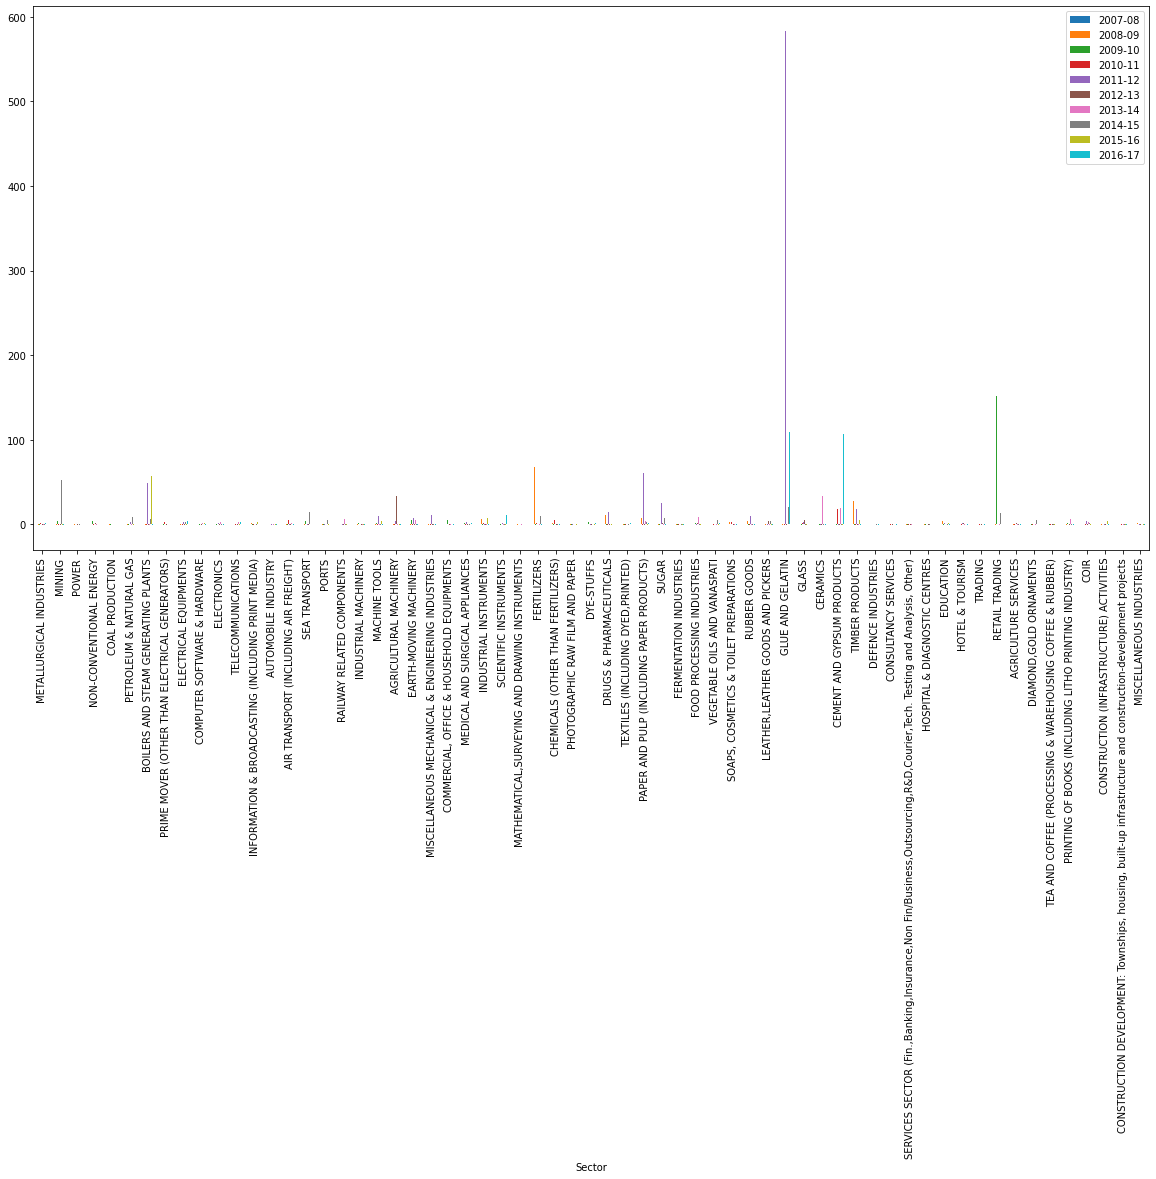

In [33]:
df.iloc[:, 7:].pct_change(axis=1).plot(kind='bar', figsize=(20,10))

Starting to 2006-07 period 

(because there has been a sharp increase in investment post this period)

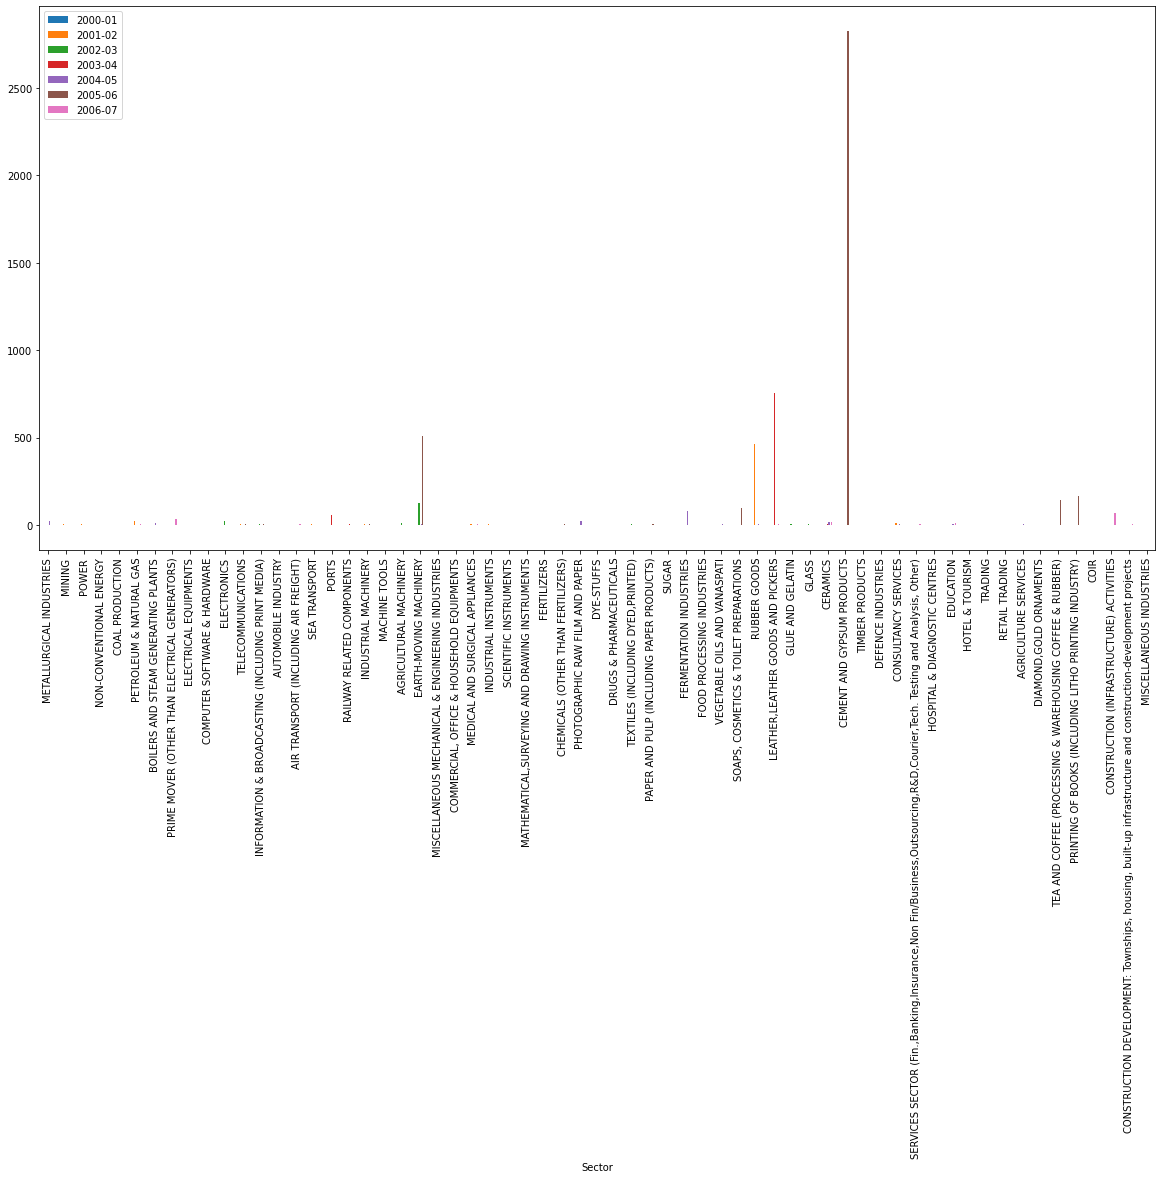

In [34]:
df.iloc[:, :7].pct_change(axis=1).plot(kind='bar', figsize=(20,10))